In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [3]:
# Adding training data
trainFile = "train.csv"
trainingData = pd.read_csv(trainFile, delimiter=",")

In [4]:
display(trainingData)

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
0,1,67.1,146,2017,0,263,262,264,62,0.01,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
1,2,59.8,146,2016,0,271,278,264,64,0.01,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
2,3,57.6,146,2015,0,268,246,290,66,0.01,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
3,4,55.5,146,2014,0,272,248,296,69,0.01,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
4,5,57.7,146,2013,0,275,278,272,71,0.01,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,2067,47.7,61,2006,0,578,596,560,36,2.46,...,84,7.33,83.0,17.6,59.67,11731746,7.2,7.1,0.456,3.240370
2067,2068,46.0,61,2005,0,64,66,62,39,2.33,...,85,8.18,83.0,18.2,480.66,11421984,7.3,7.2,0.443,3.193744
2068,2069,46.2,61,2004,0,69,70,68,41,2.44,...,85,6.93,84.0,18.4,422.39,111249,7.4,7.3,0.433,3.162278
2069,2070,47.1,61,2003,0,611,574,648,43,2.61,...,86,6.56,85.0,18.6,423.67,1824125,7.4,7.4,0.424,3.130495


In [5]:
trainingData.describe()

,ID,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,InfantDeaths,Alcohol,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,1036.000000,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,597.990524,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,1.000000,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,518.500000,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,1036.000000,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,1553.500000,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,2071.000000,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


<Figure size 432x288 with 0 Axes>

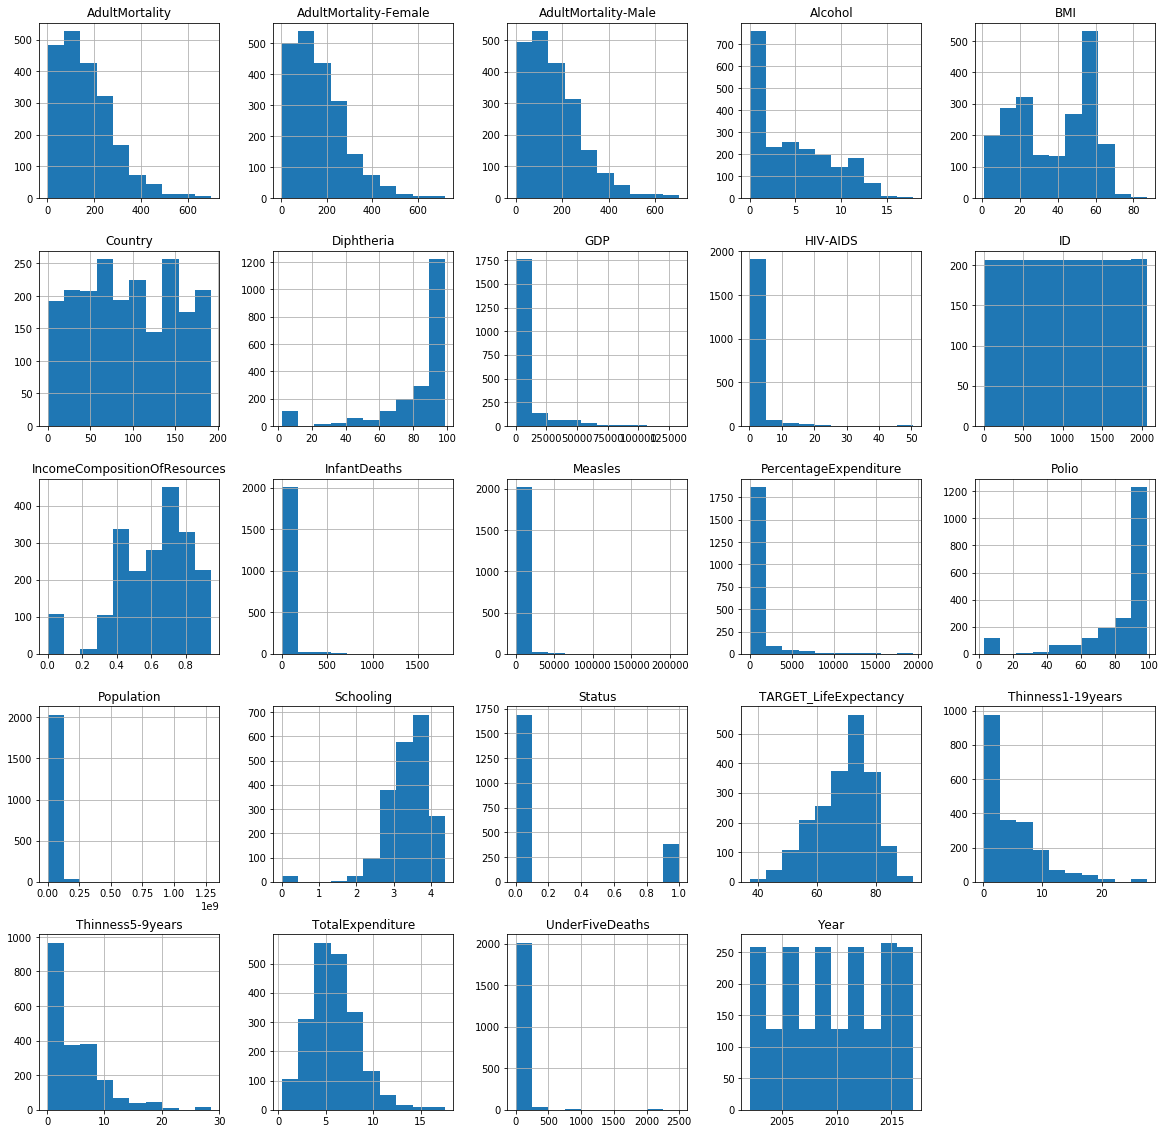

In [6]:
plt.figure()
trainingData.hist(figsize = (20, 20))
plt.show()

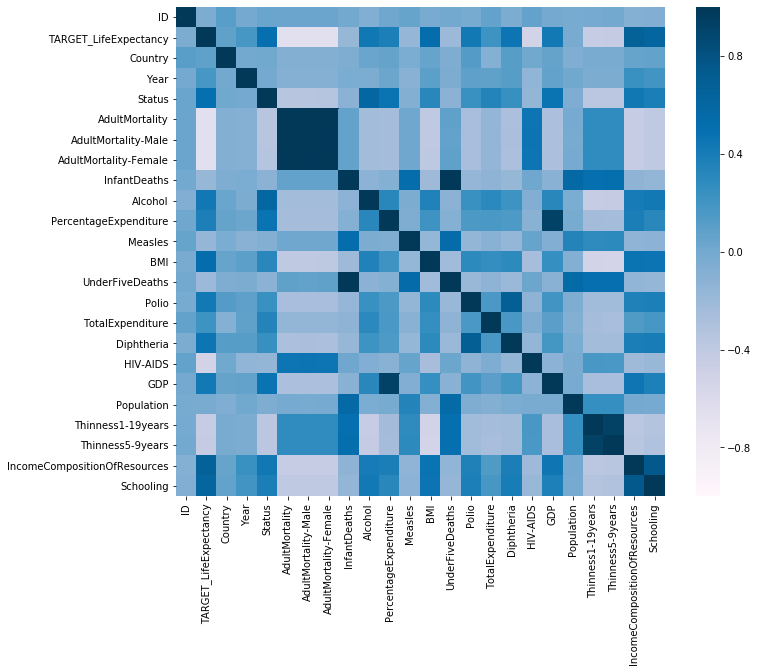

In [7]:
import seaborn as sns

correlations = trainingData.corr()
f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(correlations, cmap = "PuBu", center = 0, vmin = -1, vmax = 1, square = True)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

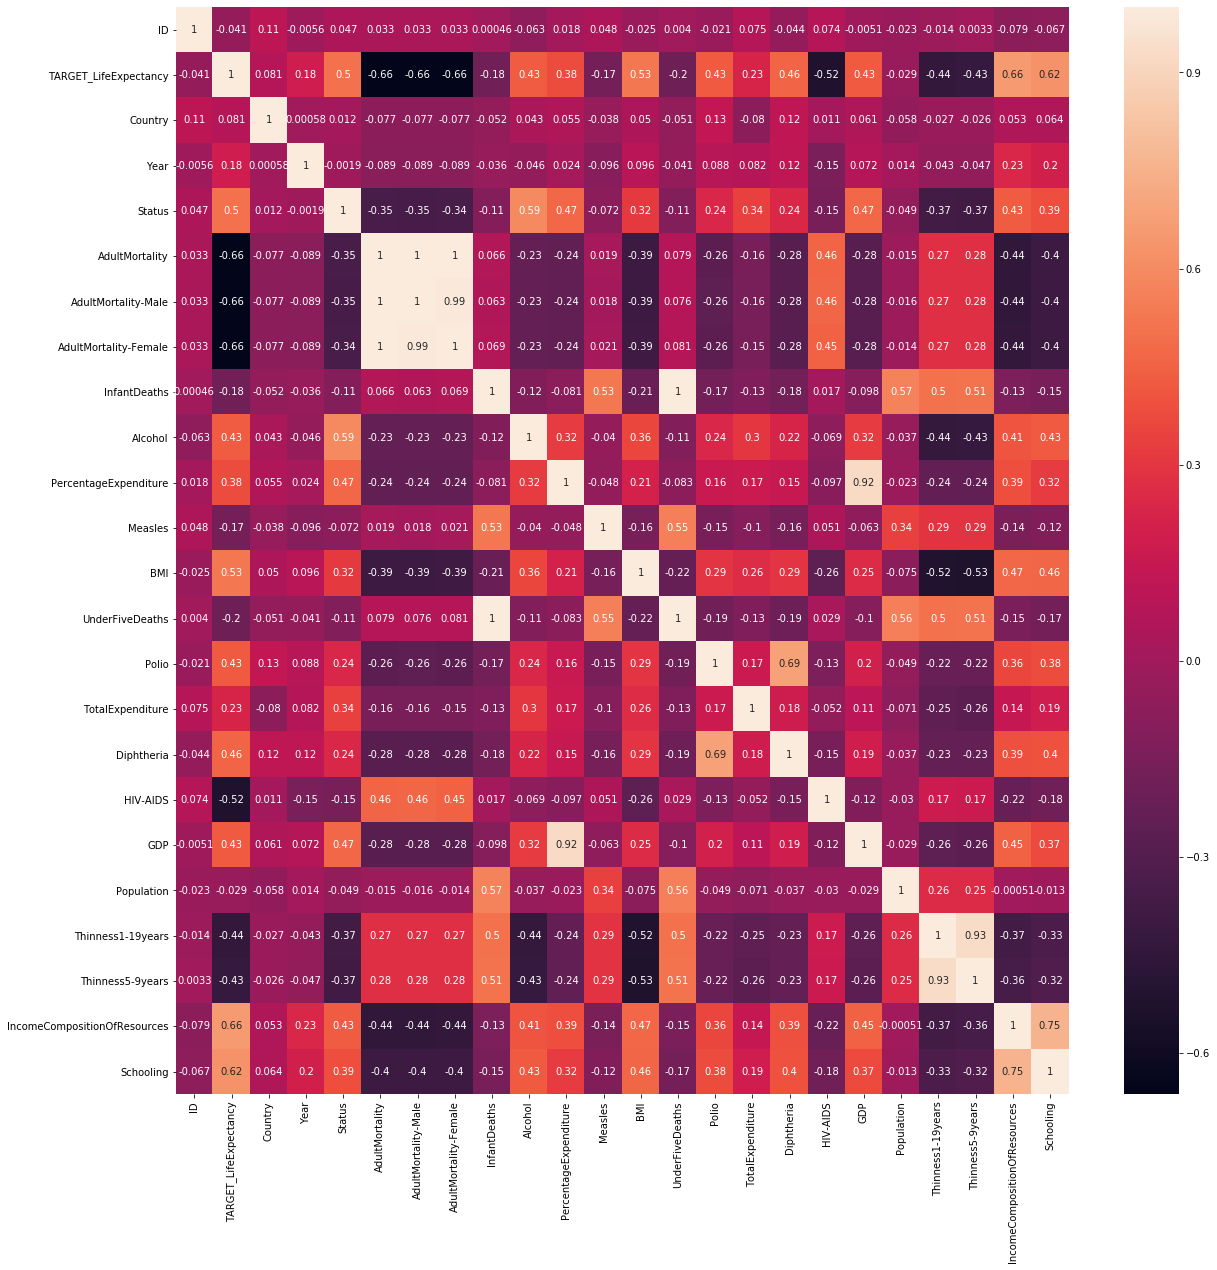

In [8]:
# This graph just shows the values of the correlations
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

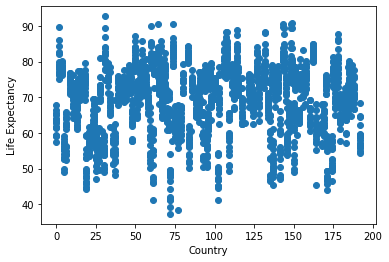

In [9]:
plt.scatter(trainingData['Country'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()

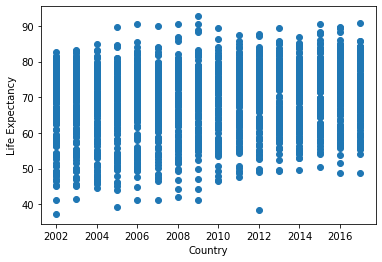

In [10]:
plt.scatter(trainingData['Year'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.show()

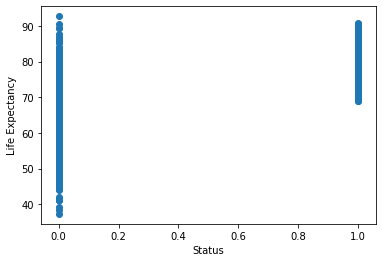

In [11]:
plt.scatter(trainingData['Status'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

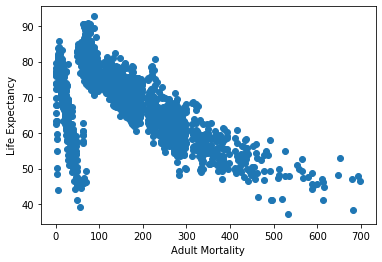

In [12]:
plt.scatter(trainingData['AdultMortality'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

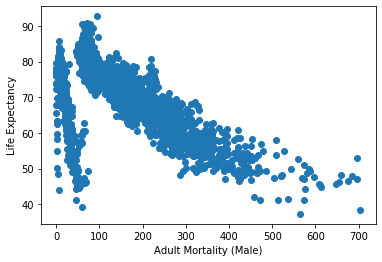

In [13]:
plt.scatter(trainingData['AdultMortality-Male'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Adult Mortality (Male)')
plt.ylabel('Life Expectancy')
plt.show()

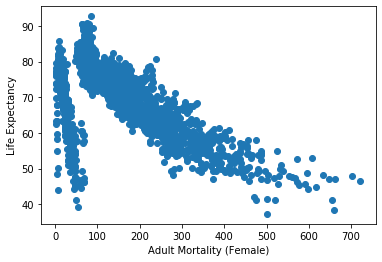

In [14]:
plt.scatter(trainingData['AdultMortality-Female'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Adult Mortality (Female)')
plt.ylabel('Life Expectancy')
plt.show()

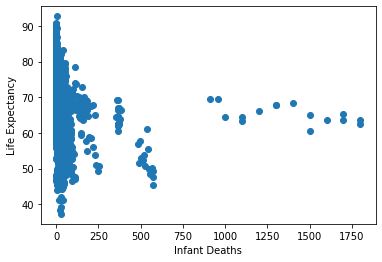

In [15]:
plt.scatter(trainingData['InfantDeaths'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Infant Deaths')
plt.ylabel('Life Expectancy')
plt.show()

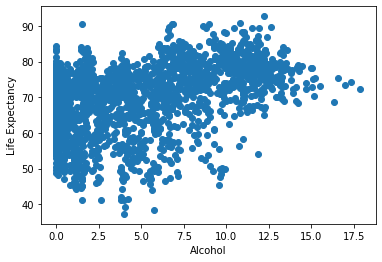

In [16]:
plt.scatter(trainingData['Alcohol'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')
plt.show()

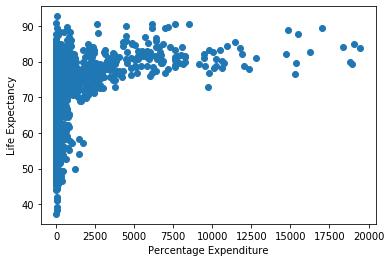

In [17]:
plt.scatter(trainingData['PercentageExpenditure'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.show()

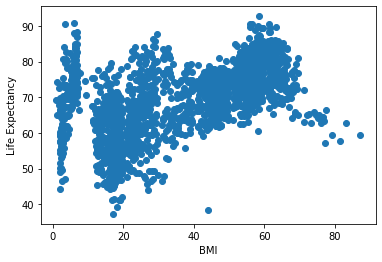

In [18]:
plt.scatter(trainingData['BMI'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

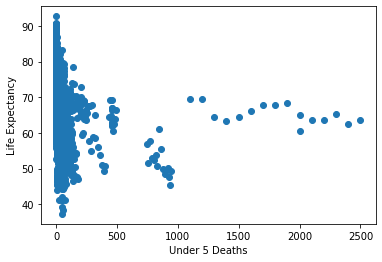

In [19]:
plt.scatter(trainingData['UnderFiveDeaths'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Under 5 Deaths')
plt.ylabel('Life Expectancy')
plt.show()

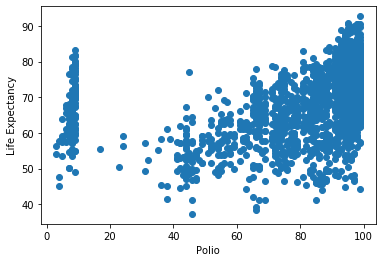

In [20]:
plt.scatter(trainingData['Polio'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Polio')
plt.ylabel('Life Expectancy')
plt.show()

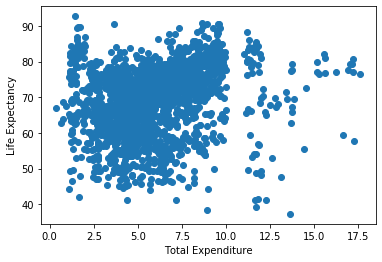

In [21]:
plt.scatter(trainingData['TotalExpenditure'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Total Expenditure')
plt.ylabel('Life Expectancy')
plt.show()

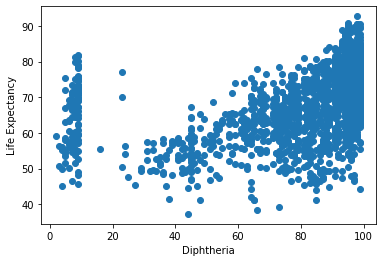

In [22]:
plt.scatter(trainingData['Diphtheria'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Diphtheria')
plt.ylabel('Life Expectancy')
plt.show()

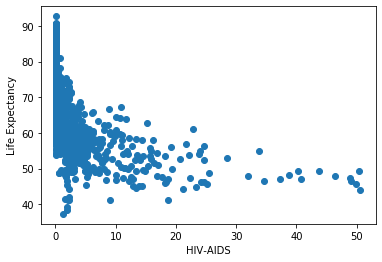

In [23]:
plt.scatter(trainingData['HIV-AIDS'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('HIV-AIDS')
plt.ylabel('Life Expectancy')
plt.show()

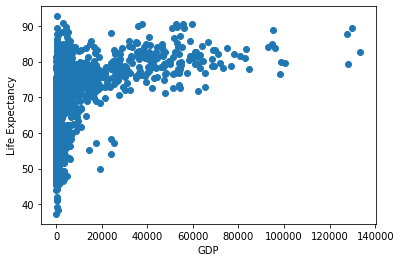

In [24]:
plt.scatter(trainingData['GDP'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

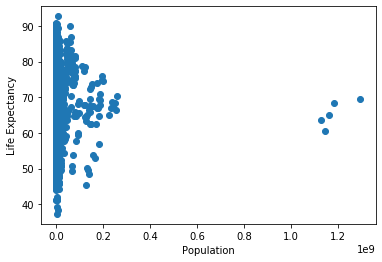

In [25]:
plt.scatter(trainingData['Population'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.show()

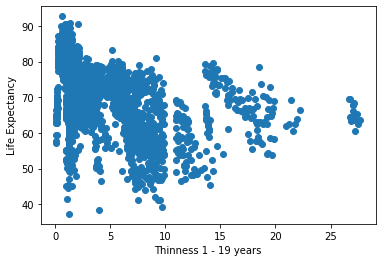

In [26]:
plt.scatter(trainingData['Thinness1-19years'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Thinness 1 - 19 years')
plt.ylabel('Life Expectancy')
plt.show()

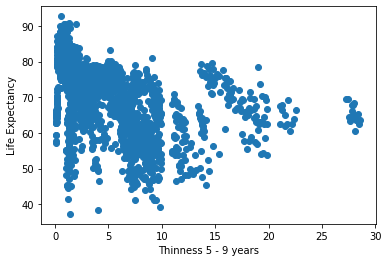

In [27]:
plt.scatter(trainingData['Thinness5-9years'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Thinness 5 - 9 years')
plt.ylabel('Life Expectancy')
plt.show()

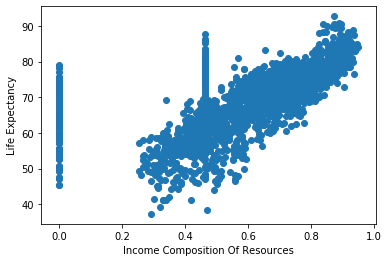

In [28]:
plt.scatter(trainingData['IncomeCompositionOfResources'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Income Composition Of Resources')
plt.ylabel('Life Expectancy')
plt.show()

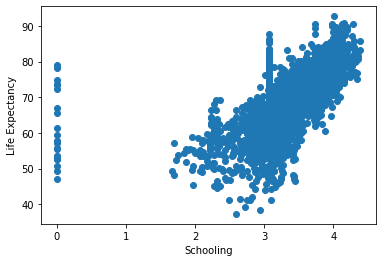

In [29]:
plt.scatter(trainingData['Schooling'], trainingData['TARGET_LifeExpectancy'])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

In [30]:
# Splitting into X features and Y output
dataX = trainingData.drop(["ID", "TARGET_LifeExpectancy"], axis = 1) 
dataY = trainingData[["TARGET_LifeExpectancy"]]

In [31]:
# Linear regression vs Polynomial regression, which is better

In [32]:
# 80% Training data, 20% Validation data

In [33]:
from sklearn.model_selection import train_test_split
trainX, validX, trainY, validY = train_test_split(np.array(dataX), np.array(dataY), test_size = 0.2)
print(trainX.shape)
print(validX.shape)
print(trainY.shape)
print(validY.shape)

(1656, 22)
(415, 22)
(1656, 1)
(415, 1)


In [34]:
# Linear Regression (Testing)

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lineReg = linear_model.LinearRegression()
lineReg.fit(trainX, trainY)

print("Linear Regression: ")
print("y-intercept: ")
print(lineReg.intercept_)
print()

print("coefficients: ")
print(lineReg.coef_)
print()

print("Training set score: " + str(round(lineReg.score(trainX, trainY), 2)))
print("Valid set score: " + str(round(lineReg.score(validX, validY), 2)))
print()

lineRegPredictY = lineReg.predict(validX)

print("Mean squared error: ", mean_squared_error(validY, lineRegPredictY))
print("Mean absolute error: ", mean_absolute_error(validY, lineRegPredictY))
print("R squared score: ", r2_score(validY, lineRegPredictY))

Linear Regression: 
y-intercept: 
[-29.19967073]

coefficients: 
[[ 3.22740844e-03  4.20680558e-02  2.58928654e+00 -6.91447086e-03
  -1.88110127e-03 -1.19478405e-02  9.17733197e-02  1.72098907e-01
  -3.38876763e-05 -1.98663834e-05  3.41439204e-02 -6.72418986e-02
   2.05474733e-02 -6.80904325e-03  3.32116561e-02 -5.09602555e-01
   4.75592801e-05 -1.64380653e-09 -1.19599288e-01 -1.45794756e-02
   6.26124116e+00  2.22043281e+00]]

Training set score: 0.76
Valid set score: 0.74

Mean squared error:  22.08903933737346
Mean absolute error:  3.645606131952478
R squared score:  0.7392995442949651


In [36]:
# Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# Checking the degree of polynomial from 1 (linear) to 5
minDegreeIndex = 1;
maxDegreeIndex = 5;

index = minDegreeIndex

# Array to store data for graphs
degreeArray = []
ssArray = []
mseArray = []
maeArray = []
r2ScoreArray = []

for index in range(minDegreeIndex, maxDegreeIndex + 1):
    polyFeat = PolynomialFeatures(degree = index, include_bias = True)
    polyTrainX = polyFeat.fit_transform(trainX)
    polyValidX = polyFeat.fit_transform(validX)

    # For poly regression
    polyReg = linear_model.LinearRegression()
    polyReg.fit(polyTrainX, trainY)

    print("Polynomial Regression degree = " + str(index) + ":")
    print("y-intercept: ")
    print(polyReg.intercept_)
    print()
    
    print("coefficients: ")
    print(polyReg.coef_)
    print()
    
    tsScore = round(polyReg.score(polyTrainX, trainY), 2)
    print("Training set score: " + str(tsScore))
    
    vsScore = round(polyReg.score(polyValidX, validY), 2)
    print("Valid set score: " + str(vsScore))
    print()
    
    ssArray.append(abs(tsScore - vsScore))
    
    polyRegPredictY = polyReg.predict(polyValidX)

    mse = mean_squared_error(validY, polyRegPredictY)
    print("Mean squared error: ", mse)
    mseArray.append(mse)
    
    mae = mean_absolute_error(validY, polyRegPredictY)
    print("Mean absolute error: ", mae)
    maeArray.append(mae)
    
    r2Score = r2_score(validY, polyRegPredictY)
    print("R squared score: ", r2Score)
    r2ScoreArray.append(r2Score)
    print()
    
    degreeArray.append(index)
    index = index + 1

Polynomial Regression degree = 1:
y-intercept: 
[-29.19967073]

coefficients: 
[[ 0.00000000e+00  3.22740844e-03  4.20680558e-02  2.58928654e+00
  -6.91447087e-03 -1.88110127e-03 -1.19478405e-02  9.17733197e-02
   1.72098907e-01 -3.38876763e-05 -1.98663834e-05  3.41439204e-02
  -6.72418986e-02  2.05474733e-02 -6.80904325e-03  3.32116561e-02
  -5.09602555e-01  4.75592801e-05 -1.64380654e-09 -1.19599288e-01
  -1.45794756e-02  6.26124116e+00  2.22043281e+00]]

Training set score: 0.76
Valid set score: 0.74

Mean squared error:  22.08903933733472
Mean absolute error:  3.6456061319357658
R squared score:  0.7392995442954223

Polynomial Regression degree = 2:
y-intercept: 
[-8.63344188]

coefficients: 
[[-3.00459361e-03 -1.31436683e-04 -6.95933774e-07  6.72279007e-07
   1.44387723e-05  2.11759382e-05  7.73171019e-06 -2.40760979e-05
   2.00223280e-06 -4.71508238e-04  4.39228735e-04 -5.28611268e-06
  -3.05685307e-05 -7.88637948e-06  1.66849584e-07 -8.87961256e-06
   4.39382812e-07 -3.88665786e

Text(0, 0.5, 'Difference in Train Set Score and Valid Set Score')

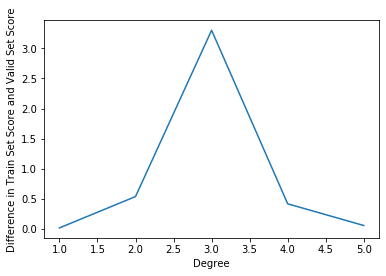

In [38]:
plt.plot(degreeArray, ssArray)
plt.xlabel("Degree")
plt.ylabel("Difference in Train Set Score and Valid Set Score")

Text(0, 0.5, 'Difference in Train Set Score and Valid Set Score')

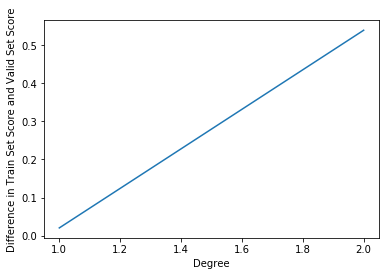

In [39]:
plt.plot(degreeArray[:2], ssArray[:2])
plt.xlabel("Degree")
plt.ylabel("Difference in Train Set Score and Valid Set Score")

Text(0, 0.5, 'MSE')

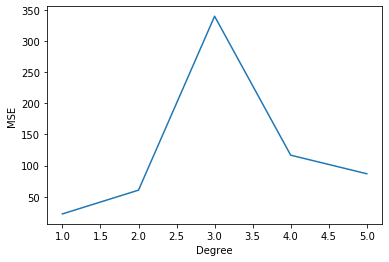

In [40]:
plt.plot(degreeArray, mseArray)
plt.xlabel("Degree")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

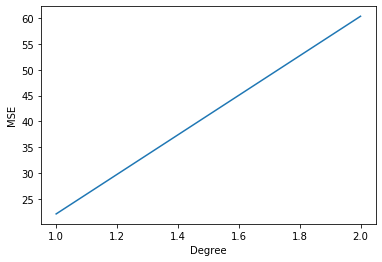

In [41]:
plt.plot(degreeArray[:2], mseArray[:2])
plt.xlabel("Degree")
plt.ylabel("MSE")

Text(0, 0.5, 'MAE')

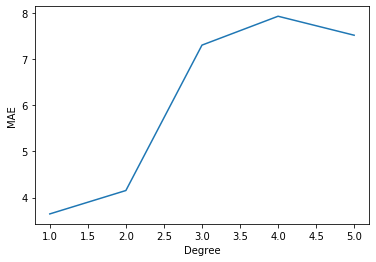

In [42]:
plt.plot(degreeArray, maeArray)
plt.xlabel("Degree")
plt.ylabel("MAE")

Text(0, 0.5, 'MAE')

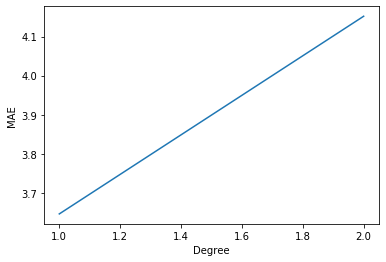

In [43]:
plt.plot(degreeArray[:2], maeArray[:2])
plt.xlabel("Degree")
plt.ylabel("MAE")

Text(0, 0.5, 'R2 Score')

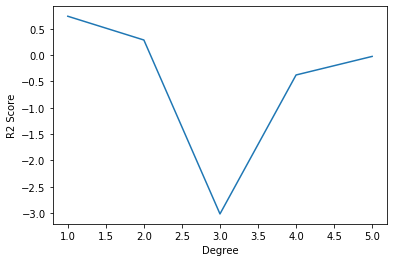

In [44]:
plt.plot(degreeArray, r2ScoreArray)
plt.xlabel("Degree")
plt.ylabel("R2 Score")

Text(0, 0.5, 'R2 Score')

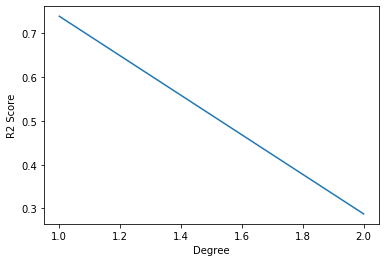

In [45]:
plt.plot(degreeArray[:2], r2ScoreArray[:2])
plt.xlabel("Degree")
plt.ylabel("R2 Score")

In [46]:
# K fold cross validation for linear regression (Deciding the real model/hyperparameter values)

In [47]:
from sklearn import model_selection
# 2071/19 = 109, 1 split has 109 data
number_splits = 19
kFold = model_selection.KFold(n_splits = number_splits, shuffle = False)

In [48]:
# Storing data/values in array
trainXArray = []
trainYArray = []
validXArray = []
validYArray = []

lineRegArray = [] 

ssArray = []
mseArray = []
maeArray = []
r2ScoreArray = []

# Creating an array of index for the graph
foldIndexArray = []

for x in range(number_splits):
    foldIndexArray.append(x)
    x = x + 1

# Calulating average metrics to determine best model
averageMSE = 0;
averageMAE = 0;
averageR2Score = 0;

# Used for print
index = 0;

for trainIndex, validIndex in kFold.split(dataX):
# Get the training and validation data
    kfTrainX = np.array(dataX.loc[trainIndex])
    trainXArray.append(kfTrainX)
    
    kfTrainY = np.array(dataY.loc[trainIndex])
    trainYArray.append(kfTrainY)
    
    kfValidX = np.array(dataX.loc[validIndex])
    validXArray.append(kfValidX)
    
    kfValidY = np.array(dataY.loc[validIndex])
    validYArray.append(kfValidY)

    lineReg = linear_model.LinearRegression()
    lineReg.fit(kfTrainX, kfTrainY)
    lineRegArray.append(lineReg)
    
    print("Linear Regression (index = " + str(index) + "): ")
    print("y-intercept: ")
    print(lineReg.intercept_)
    print()
    
    print("coefficients: ")
    print(lineReg.coef_)
    print()
    
    tsScore = round(lineReg.score(kfTrainX, kfTrainY), 2)
    print("Training set score: " + str(tsScore))
    
    vsScore = round(lineReg.score(kfValidX, kfValidY), 2)
    print("Valid set score: " + str(vsScore))
    print()
    
    ssArray.append(abs(tsScore - vsScore))
    
    lineRegPredictY = lineReg.predict(kfValidX)
    
    mse = mean_squared_error(kfValidY, lineRegPredictY)
    print("Mean squared error: ", mse)
    mseArray.append(mse)
    
    mae = mean_absolute_error(kfValidY, lineRegPredictY)
    print("Mean absolute error: ", mae)
    maeArray.append(mae)
    
    r2Score = r2_score(kfValidY, lineRegPredictY)
    print("R squared score: ", r2Score)
    r2ScoreArray.append(r2Score)
    print()
    
    averageMSE = averageMSE + mse
    averageMAE = averageMAE + mae
    averageR2Score = averageR2Score + r2Score
    
    index = index + 1;

# Find the linear regression model closest to MSE, MAE & R Squared
bestValueForMSE = 0
modelIndexInArrayForMSE = 0

bestValueForMAE = 0
modelIndexInArrayForMAE = 0

bestValueForR2Score = 0
modelIndexInArrayForR2Score = 0

index = 0

averageMSE = averageMSE / number_splits
averageMAE = averageMAE / number_splits
averageR2Score = averageR2Score / number_splits
for index in range(number_splits):
    if index == 0:
        bestValueForMSE = abs(averageMSE - mseArray[index])
        bestValueForMAE = abs(averageMAE - maeArray[index])
        bestValueForR2Score = abs(averageR2Score - r2ScoreArray[index])
        
    else:
        # check for difference in MSE
        difference = abs(averageMSE - mseArray[index])
        if difference < bestValueForMSE:
            bestValueForMSE = difference
            modelIndexInArrayForMSE = index
            
        # check for difference in MAE
        difference = abs(averageMAE - maeArray[index])
        if difference < bestValueForMAE:
            bestValueForMAE = difference
            modelIndexInArrayForMAE = index
        
        # check for difference in R squared
        difference = abs(averageR2Score - r2ScoreArray[index])
        if difference < bestValueForR2Score:
            bestValueForR2Score = difference
            modelIndexInArrayForR2Score = index 
            
    index = index + 1;
    
print("---Average Metrics---")
print("Average MSE: ", averageMSE)
print("Average MAE: ", averageMAE)
print("Average R Squared score: ", averageR2Score)
print()

print("---Best Model based on average metrics---")
print("Best model for MSE (index): ", modelIndexInArrayForMSE)
print("Best model for MAE (index): ", modelIndexInArrayForMAE)
print("Best model for R2 score (index): ", modelIndexInArrayForR2Score)

Linear Regression (index = 0): 
y-intercept: 
[-63.544376]

coefficients: 
[[ 3.94790967e-03  5.77226843e-02  2.71432823e+00 -6.49697229e-03
  -2.91484320e-03 -1.00791014e-02  9.10301114e-02  1.42360678e-01
   3.27685794e-06 -8.31330237e-06  2.81905668e-02 -6.76656180e-02
   1.67739793e-02  4.08952729e-02  2.50184901e-02 -5.04614598e-01
   3.70907633e-05 -1.58576370e-09 -4.57336480e-02 -4.25150627e-02
   5.97556375e+00  3.29124749e+00]]

Training set score: 0.77
Valid set score: 0.27

Mean squared error:  30.256862106983633
Mean absolute error:  3.3685162164877243
R squared score:  0.2650423530985986

Linear Regression (index = 1): 
y-intercept: 
[-58.38528479]

coefficients: 
[[ 3.24468346e-03  5.64144927e-02  2.20875542e+00 -6.66195532e-03
  -3.56131186e-03 -9.76259878e-03  9.44617486e-02  2.12822148e-01
  -3.42445826e-05 -8.47196601e-06  3.21048534e-02 -7.01508978e-02
   2.04706900e-02  1.24831709e-02  3.08359200e-02 -5.08236087e-01
   4.69044927e-05 -1.59191276e-09 -8.16224430e-02 

Text(0, 0.5, 'Difference in Train Set Score and Valid Set Score')

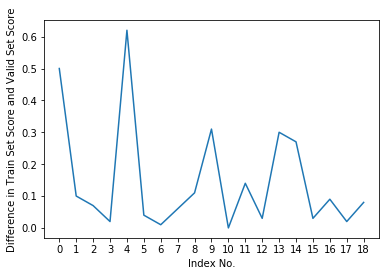

In [49]:
plt.plot(foldIndexArray, ssArray)
plt.xlabel("Index No.")
plt.xticks(np.arange(0, number_splits, 1))
plt.ylabel("Difference in Train Set Score and Valid Set Score")

Text(0, 0.5, 'MSE')

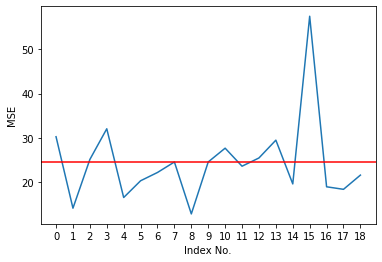

In [50]:
plt.plot(foldIndexArray, mseArray)
plt.axhline(y = averageMSE, color = "r")
plt.xlabel("Index No.")
plt.xticks(np.arange(0, number_splits, 1))
plt.ylabel("MSE")

Text(0, 0.5, 'MAE')

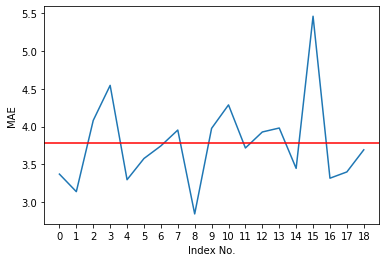

In [51]:
plt.plot(foldIndexArray, maeArray)
plt.axhline(y = averageMAE, color = "r")
plt.xlabel("Index No.")
plt.xticks(np.arange(0, number_splits, 1))
plt.ylabel("MAE")

Text(0, 0.5, 'R2 Score')

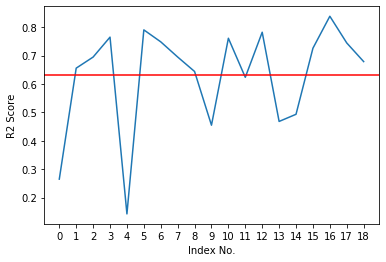

In [52]:
plt.plot(foldIndexArray, r2ScoreArray)
plt.axhline(y = averageR2Score, color = "r")
plt.xlabel("Index No.")
plt.xticks(np.arange(0, number_splits, 1))
plt.ylabel("R2 Score")

In [53]:
# Choosing my model

In [54]:
# Based on MAE
modelIndex = modelIndexInArrayForMSE
bestLineFromKFold = lineRegArray[modelIndex]

print("My model")
print("Model Index: ", modelIndexInArrayForMSE)
print()

print("y-intercept: ")
print(bestLineFromKFold.intercept_)
print()

print("coefficients: ")
print(bestLineFromKFold.coef_)
print()

My model
Model Index:  7

y-intercept: 
[-89.02110727]

coefficients: 
[[ 2.45523018e-03  7.22938297e-02  2.68428259e+00 -6.73170811e-03
  -3.15297827e-03 -1.03104380e-02  1.04624463e-01  1.99853467e-01
  -2.50132729e-05  4.17182672e-06  3.25270258e-02 -7.93031413e-02
   1.86675804e-02 -1.71545584e-02  2.77760973e-02 -4.98546184e-01
   4.30026973e-05 -2.86312059e-09 -6.65842542e-02 -3.28984504e-02
   6.94198094e+00  1.98454480e+00]]



In [55]:
# Using regularisation on my model (determine best regularisation method)

In [56]:
# Ridge regression

In [57]:
from sklearn.metrics import explained_variance_score

lRegPara = np.linspace(0.001, .5, num=20)

# Arrays to store data to display graphs
mseArray = []
maeArray = []
r2ScoreArray = []
regParaArray = []

print("Linear regression model index: ", modelIndex)

for j, regPara in enumerate(lRegPara):
    # Fitting model for Ridge Regression
    lineRidgeReg = linear_model.Ridge(alpha = regPara, normalize = True)
    lineRidgeRegModel = lineRidgeReg.fit(trainXArray[modelIndex], trainYArray[modelIndex])
    
    print("Ridge Regression (alpha = " + str(regPara) + "): ")
    print("y-intercept: ")
    print(lineRidgeReg.intercept_)
    print()
    
    print("coefficients: ")
    print(lineRidgeReg.coef_)
    print()
    
    print("Training set score: " + str(round(lineRidgeReg.score(trainX, trainY), 2)))
    print("Valid set score: " + str(round(lineRidgeReg.score(validX, validY), 2)))
    print()
    
    predictLineRidgeReg = lineRidgeReg.predict(validXArray[modelIndex])

    mse = mean_squared_error(validYArray[modelIndex], predictLineRidgeReg)
    print("Mean squared error: ", mse)
    mseArray.append(mse)
    
    mae = mean_absolute_error(validYArray[modelIndex], predictLineRidgeReg)
    print("Mean absolute error: ", mae)
    maeArray.append(mae)
    
    r2Score = r2_score(validYArray[modelIndex], predictLineRidgeReg)
    print("R squared score: ", r2Score)
    r2ScoreArray.append(r2Score)
    
    regParaArray.append(regPara)
    
    print()

Linear regression model index:  7
Ridge Regression (alpha = 0.001): 
y-intercept: 
[-85.9895303]

coefficients: 
[[ 2.64438409e-03  7.07574765e-02  2.69440645e+00 -6.76118010e-03
  -3.60139036e-03 -9.90036844e-03  8.71188011e-02  1.94168190e-01
  -1.81793430e-05 -1.10050500e-06  3.27358281e-02 -6.74200210e-02
   1.85726449e-02 -1.81280171e-02  2.84011456e-02 -4.99971817e-01
   4.15151693e-05 -1.61264078e-09 -7.03554863e-02 -2.53144180e-02
   7.04102787e+00  1.97531741e+00]]

Training set score: 0.76
Valid set score: 0.75

Mean squared error:  26.083919218673984
Mean absolute error:  4.042902842417436
R squared score:  0.6760133805294657

Ridge Regression (alpha = 0.027263157894736843): 
y-intercept: 
[-76.16473064]

coefficients: 
[[ 3.34959871e-03  6.58150806e-02  2.68341773e+00 -6.93342407e-03
  -6.19092406e-03 -7.62663007e-03  1.23726749e-02  1.68748128e-01
   3.40225859e-05 -2.38349912e-05  3.36762511e-02 -1.66051572e-02
   1.85862167e-02 -2.17762269e-02  3.08229597e-02 -4.93878356

Text(0, 0.5, 'MSE')

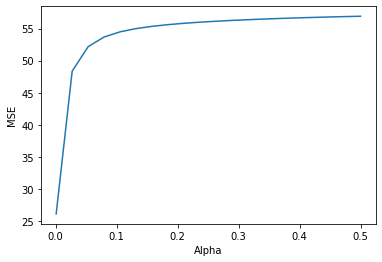

In [58]:
plt.plot(regParaArray, mseArray)
plt.xlabel("Alpha")
plt.ylabel("MSE")

Text(0, 0.5, 'MAE')

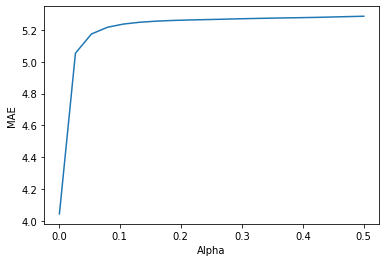

In [59]:
plt.plot(regParaArray, maeArray)
plt.xlabel("Alpha")
plt.ylabel("MAE")

Text(0, 0.5, 'R2 Score')

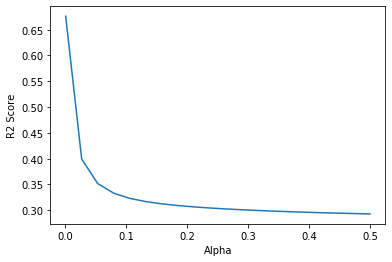

In [60]:
plt.plot(regParaArray, r2ScoreArray)
plt.xlabel("Alpha")
plt.ylabel("R2 Score")

In [61]:
# Lasso Regression

In [62]:
from sklearn.metrics import explained_variance_score

lRegPara = np.linspace(0.001,.5,num = 20)

# Arrays to store data to display graphs
mseArray = []
maeArray = []
r2ScoreArray = []
regParaArray = []

print("Linear regression model index: ", modelIndex)

for j, regPara in enumerate(lRegPara):
    # Fitting model for Lasso Regression
    lineLassoReg = linear_model.Lasso(alpha = regPara, normalize = True)
    lineLassoRegModel = lineLassoReg.fit(trainXArray[modelIndex], trainYArray[modelIndex])
    
    print("Ridge Regression (alpha = " + str(regPara) + "): ")
    print("y-intercept: ")
    print(lineLassoReg.intercept_)
    print()
    
    print("coefficients: ")
    print(lineLassoReg.coef_)
    print()
    
    print("Training set score: " + str(round(lineLassoReg.score(trainX, trainY), 2)))
    print("Valid set score: " + str(round(lineLassoReg.score(validX, validY), 2)))
    print()
    
    predictLineLassoReg = lineLassoReg.predict(validXArray[modelIndex])

    mse = mean_squared_error(validYArray[modelIndex], predictLineLassoReg)
    print("Mean squared error: ", mse)
    mseArray.append(mse)
    
    mae = mean_absolute_error(validYArray[modelIndex], predictLineLassoReg)
    print("Mean absolute error: ", mae)
    maeArray.append(mae)
    
    r2Score = r2_score(validYArray[modelIndex], predictLineLassoReg)
    print("R squared score: ", r2Score)
    r2ScoreArray.append(r2Score)
    
    regParaArray.append(regPara)
    
    print()

Linear regression model index:  7
Ridge Regression (alpha = 0.001): 
y-intercept: 
[-51.86721553]

coefficients: 
[ 3.03761226e-03  5.36335036e-02  2.68429747e+00 -1.47205685e-02
 -0.00000000e+00 -5.72293438e-03  0.00000000e+00  1.59482654e-01
  0.00000000e+00 -2.15352693e-05  3.26889719e-02 -8.40407709e-03
  1.73983411e-02 -0.00000000e+00  3.09884852e-02 -5.07077132e-01
  3.48689959e-05  2.70380332e-09 -7.29926597e-02 -0.00000000e+00
  7.74645782e+00  1.91733179e+00]

Training set score: 0.73
Valid set score: 0.73

Mean squared error:  56.79534245196891
Mean absolute error:  5.342937943519157
R squared score:  0.29454884258684755

Ridge Regression (alpha = 0.027263157894736843): 
y-intercept: 
[58.66187603]

coefficients: 
[ 0.00000000e+00  0.00000000e+00  2.24756111e+00 -1.92244331e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.33370763e-02
  0.00000000e+00 -0.00000000e+00  2.47466381e-02 -1.80357640e-03
  3.89205500e-03  0.00000000e+00  1.88961640e-02 -3.52860397e-01
  0.00

Text(0, 0.5, 'MSE')

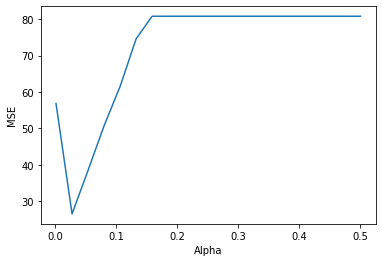

In [63]:
plt.plot(regParaArray, mseArray)
plt.xlabel("Alpha")
plt.ylabel("MSE")

Text(0, 0.5, 'MAE')

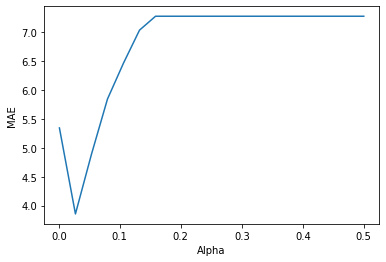

In [64]:
plt.plot(regParaArray, maeArray)
plt.xlabel("Alpha")
plt.ylabel("MAE")

Text(0, 0.5, 'R2 Score')

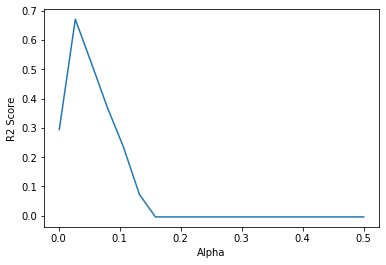

In [65]:
plt.plot(regParaArray, r2ScoreArray)
plt.xlabel("Alpha")
plt.ylabel("R2 Score")

In [66]:
# My final model (Hard coded values) Linear Regression + Lasso (Regularisation)

In [67]:
# Hard coded value, lassoAlpha
lassoAlpha = 0.027 

lineLassoReg = linear_model.Lasso(alpha = lassoAlpha, normalize = True)
lineLassoRegModel = lineLassoReg.fit(trainXArray[modelIndex], trainYArray[modelIndex])

print("Lasso Regression (alpha = " + str(lassoAlpha) + "): ")
print("y-intercept: ")
print(lineLassoReg.intercept_)
print()

print("coefficients: ")
print(lineLassoReg.coef_)
print()

print("Training set score: " + str(round(lineLassoReg.score(trainX, trainY), 2)))
print("Valid set score: " + str(round(lineLassoReg.score(validX, validY), 2)))
print()

predictLineLassoReg = lineLassoReg.predict(validXArray[modelIndex])

mse = mean_squared_error(validYArray[modelIndex], predictLineLassoReg)
print("Mean squared error: ", mse)

mae = mean_absolute_error(validYArray[modelIndex], predictLineLassoReg)
print("Mean absolute error: ", mae)

r2Score = r2_score(validYArray[modelIndex], predictLineLassoReg)
print("R squared score: ", r2Score)
print()

Lasso Regression (alpha = 0.027): 
y-intercept: 
[58.63023815]

coefficients: 
[ 0.00000000e+00  0.00000000e+00  2.25582720e+00 -1.92365930e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.45855056e-02
  0.00000000e+00 -0.00000000e+00  2.48261989e-02 -1.87393813e-03
  4.04402563e-03  0.00000000e+00  1.90226021e-02 -3.54449144e-01
  0.00000000e+00 -0.00000000e+00 -4.35959741e-02 -0.00000000e+00
  9.21201090e+00  1.68405485e+00]

Training set score: 0.7
Valid set score: 0.69

Mean squared error:  26.457044549968742
Mean absolute error:  3.860773684165635
R squared score:  0.6713788156961846



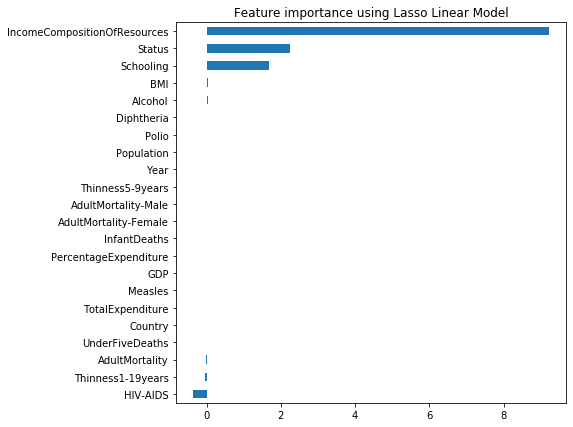

In [74]:
coef = pd.Series(np.squeeze(lineLassoReg.coef_), index = dataX.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh", figsize = (7, 7))
plt.title("Feature importance using Lasso Linear Model")
plt.show()

In [ ]:
# Putting it in testing data

In [ ]:
testFile = "test.csv"
testingData = pd.read_csv(testFile, delimiter=",")

In [ ]:
display(testingData)

In [ ]:
testDataX = testingData.drop(["ID"], axis = 1) 

In [ ]:
predictTestY = lineLassoRegModel.predict(testDataX)

In [ ]:
# Saving it to csvFile

targetLifeExpectancy = pd.DataFrame(data = predictTestY, columns = ["Target_LifeExpectancy"])
mySolution = testingData["ID"]
mySolution = pd.concat([mySolution, targetLifeExpectancy], axis = 1)

mySolution.to_csv("myExpectedSolution.csv", index = False)